In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.special import comb 

## Initialize Dataset \& Weights

In [2]:
def init_(p, n):
    
    """ Initializes system parameters.
    
    :param p: The number of training sample
    :param n: The number features (dimensions)
    :returns:
        x: The training sample
        s: The true labels of training sample
        w: The weight vector      
    """

    # Generate dataset with samples that follow Gaussian distribution
    mu = np.zeros(p) 
    sigma = np.ones(p)
    # No correlation between features
    cov = np.eye(p)
    x = np.random.multivariate_normal(mu, cov, n).T

    # For the P points, randomly assign a label (either +1 or -1) with equal probability
    s = random.choices( [1, -1], weights=[1/2, 1/2], k=p )
    s = np.array(s)

    # Initialize weights for a single neuron and each feature
    w = np.zeros(n)

    return x, s, w

## Plot the Probability of being Linearly Separable 

In [78]:
def successfulPlot(A, prob, label):
    
    """ Plots the fraction Pls = C(P, N)/2^P of linearly separable functions versus a = P/N
    
    :param A: The ratio of P to N
    :param prob: The probability of being linearly separable 

    """
    
    plt.suptitle("The fraction Pls = C(P, N)/2^P of linearly separable functions versus α = P/N", fontsize=14,\
                 fontweight="bold")
    plt.xlabel("a = P/N")
    plt.ylabel("C(P,N) / 2^P")
    plt.plot(A, prob, label=label)


## Rosenblatt Perceptron Algorithm Implementation

In [119]:
def rosenblattPerceptron(x, s, w, P, c): 
    
    """ Implements Rosenblatt-Perceptron algorithm
    
    :param x: The training sample
    :param s: The true labels of training sample
    :param w: The weight vector
    :param P: The number of training samples
    :param c: The margin of whether weights change

    """
        
    for i in range(epochs):

        E = np.array([])

        for j in range(P):
            # Predict the labels
            y_pred = np.sign(x[j].dot(w.T))
            E = np.append(E, x[j].dot(w.T)*s[j])

            # Update weights in case predicted value != true value
            if (E[j] <= c):
                w = w + (x[j] * s[j])/N

        # Stop iterating when all predicted values equal true values
        if (np.all(E > c)):
            print("All instances are predicted correctly")
            break
            
    print("The accuracy of the model for N =", +N, "and P =", +P, "equals:", +np.mean(E > c), "\n")
    return np.mean(E > c)

## The Capacity of a Hyperplane

In [121]:
# # Number of features (columns)
# N = 40
# # The different ratios of P to N
# A = np.arange(0.75, 3.25, 0.25)
# # The margin of whether weights change
# c = 0
# # Initialize number of epochs
# epochs = 500

# for nd in range(5):
#     prob = []
#     accuracy = []
#     for a in A:
#         # Number of training samples (rows)
#         P = int(a*N)    
#         # Initialize training samples
#         x, s, w = init_(P, N)
#         # Run Rosenblatt-Perceptron algorithm
#         accuracy.append( rosenblattPerceptron(x, s, w, P, c) )

#         if ( P<=N ):
#             prob.append(1)
#         else:
#             q = []
#             for i in range(N):
#                 q.append( comb(P-1, i) )
#             prob.append( 2**(1-P) * np.sum(q) )

#     # Plot functions
#     plt.figure(figsize=(8, 5), dpi=80)
#     successfulPlot(A, prob, 'The actual probability of being linearly separable')
#     plt.legend(loc='best')
#     successfulPlot(A, accuracy, 'The current accuracy of the model')
#     plt.legend(loc='best')

#     plt.show()

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 



All instances are predicted correctly
The accuracy of the model for N = 40 and P = 40 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 40 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 50 equals: 1.0 



All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

The accuracy of the model for N = 40 and P = 60 equals: 0.8166666666666667 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 60 equals: 1.0 

All instances are predi

The accuracy of the model for N = 40 and P = 80 equals: 0.7125 

The accuracy of the model for N = 40 and P = 80 equals: 0.75 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 80 equals: 1.0 

The accuracy of the model for N = 40 and P = 80 equals: 0.625 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 80 equals: 1.0 

The accuracy of the model for N = 40 and P = 80 equals: 0.7875 

The accuracy of the model for N = 40 and P = 80 equals: 0.875 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 80 equals: 1.0 

The accuracy of the model for N = 40 and P = 80 equals: 0.7125 

The accuracy of the model for N = 40 and P = 80 equals: 0.5875 

The accuracy of the model for N = 40 and P = 80 equals: 0.95 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 80 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 80 

The accuracy of the model for N = 40 and P = 100 equals: 0.52 

The accuracy of the model for N = 40 and P = 100 equals: 0.56 

The accuracy of the model for N = 40 and P = 100 equals: 0.54 

The accuracy of the model for N = 40 and P = 100 equals: 0.84 

The accuracy of the model for N = 40 and P = 100 equals: 0.69 

The accuracy of the model for N = 40 and P = 100 equals: 0.7 

The accuracy of the model for N = 40 and P = 100 equals: 0.76 

The accuracy of the model for N = 40 and P = 100 equals: 0.61 

The accuracy of the model for N = 40 and P = 100 equals: 0.68 

The accuracy of the model for N = 40 and P = 100 equals: 0.75 

The accuracy of the model for N = 40 and P = 100 equals: 0.81 

The accuracy of the model for N = 40 and P = 100 equals: 0.54 

The accuracy of the model for N = 40 and P = 100 equals: 0.65 

The accuracy of the model for N = 40 and P = 100 equals: 0.63 

The accuracy of the model for N = 40 and P = 110 equals: 0.5727272727272728 

The accuracy of the model f

The accuracy of the model for N = 40 and P = 120 equals: 0.5333333333333333 



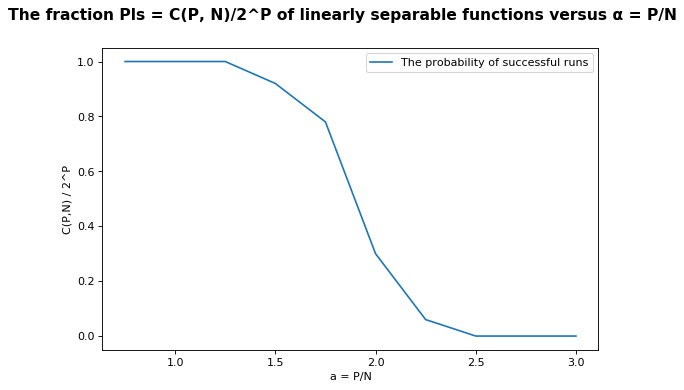

In [120]:
# Number of features (columns)
N = 40
# The different ratios of P to N
A = np.arange(0.75, 3.25, 0.25)
# The margin of whether weights change
c = 0
# Initialize number of epochs
epochs = 500
nd = 50
prob = np.array([])

for a in A:
    accuracy = np.array([])
    # Number of training samples (rows)
    P = int(a*N) 
    
    # Generate nd independent datasets
    for j in range(nd):
        # Initialize training samples
        x, s, w = init_(P, N)
        # Run Rosenblatt-Perceptron algorithm
        accuracy = np.append(accuracy, rosenblattPerceptron(x, s, w, P, c) )
        
    prob = np.append(prob, np.sum(accuracy[accuracy==1])/nd)

plt.figure(figsize=(8, 5), dpi=80)
successfulPlot(A, prob, 'The probability of successful runs')
plt.legend(loc='best')
plt.show()

### Extension-1

Observe the behavior of $Q_{l.s.}(α)$ for different system sizes $N$. Does it approach a step function with increasing $N$, as predicted by the theory? To this end, repeat the above experiments
for several larger values of $N$. For this study, you might want to consider a limited range of
$α-$values, e.g., $1.5 \leq α\leq 2.5$. and perhaps consider a smaller increment of $α$ in this interval.

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 3 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 3 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 3 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 3 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 3 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are pr

The accuracy of the model for N = 20 and P = 55 equals: 0.5818181818181818 

The accuracy of the model for N = 20 and P = 60 equals: 0.5 

The accuracy of the model for N = 20 and P = 60 equals: 0.65 

The accuracy of the model for N = 20 and P = 60 equals: 0.6 

The accuracy of the model for N = 20 and P = 60 equals: 0.6 

The accuracy of the model for N = 20 and P = 60 equals: 0.6 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 40 equals: 1.0 

All instance

The accuracy of the model for N = 100 and P = 250 equals: 0.636 

The accuracy of the model for N = 100 and P = 275 equals: 0.56 

The accuracy of the model for N = 100 and P = 275 equals: 0.6436363636363637 

The accuracy of the model for N = 100 and P = 275 equals: 0.5672727272727273 

The accuracy of the model for N = 100 and P = 275 equals: 0.6254545454545455 

The accuracy of the model for N = 100 and P = 275 equals: 0.5745454545454546 

The accuracy of the model for N = 100 and P = 300 equals: 0.5866666666666667 

The accuracy of the model for N = 100 and P = 300 equals: 0.55 

The accuracy of the model for N = 100 and P = 300 equals: 0.5733333333333334 

The accuracy of the model for N = 100 and P = 300 equals: 0.5833333333333334 

The accuracy of the model for N = 100 and P = 300 equals: 0.62 



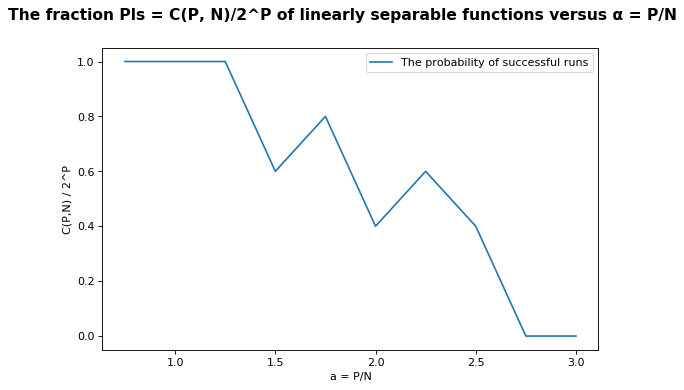

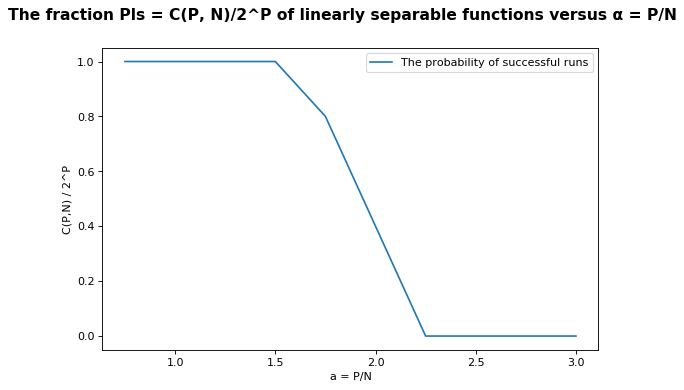

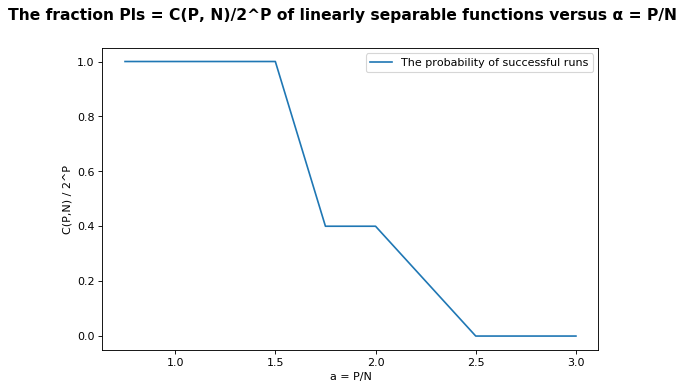

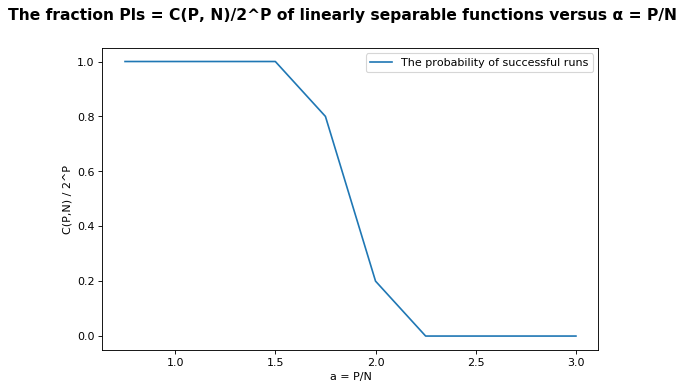

In [124]:
# Number of features (columns)
N = [5, 20, 40, 100]
# The different ratios of P to N
A = np.arange(0.75, 3.25, 0.25)
# The margin of whether weights change
c = 0
# Initialize number of epochs
epochs = 500
nd = 5

for N in N:
    prob = np.array([])
    for a in A:
        accuracy = np.array([])
        # Number of training samples (rows)
        P = int(a*N) 

        # Generate nd independent datasets
        for j in range(nd):
            # Initialize training samples
            x, s, w = init_(P, N)
            # Run Rosenblatt-Perceptron algorithm
            accuracy = np.append(accuracy, rosenblattPerceptron(x, s, w, P, c) )

        prob = np.append(prob, np.sum(accuracy[accuracy==1])/nd)

    plt.figure(figsize=(8, 5), dpi=80)
    successfulPlot(A, prob, 'The probability of successful runs')
    plt.legend(loc='best')
plt.show()

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 5 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 6 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 7 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 5 and P = 8 equals: 1.0 

The accuracy of the model for N = 5 and P = 10 equals: 0.4 

The accuracy of the model for N = 5 and P = 11 equals: 0.2727272727272727 

The accuracy of the model for N = 5 and P = 12 equals: 0.6666666666666666 

The accuracy of the model for N = 5 and P = 13 equals: 0.8461538461538461 

All instances are predicted correctly
The accuracy of the model for N = 20 and P = 20 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 20 and P = 25 equals: 1.0 

All instances are predicted correctly
The accuracy of the model for N = 20 and P = 30 equals: 1.0 

The accuracy of the

/home/chryssa/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars


All instances are predicted correctly
The accuracy of the model for N = 1000 and P = 1500 equals: 1.0 

The accuracy of the model for N = 1000 and P = 1750 equals: 0.8754285714285714 

The accuracy of the model for N = 1000 and P = 2000 equals: 0.8005 

The accuracy of the model for N = 1000 and P = 2250 equals: 0.6848888888888889 

The accuracy of the model for N = 1000 and P = 2500 equals: 0.6504 

The accuracy of the model for N = 1000 and P = 2750 equals: 0.5949090909090909 



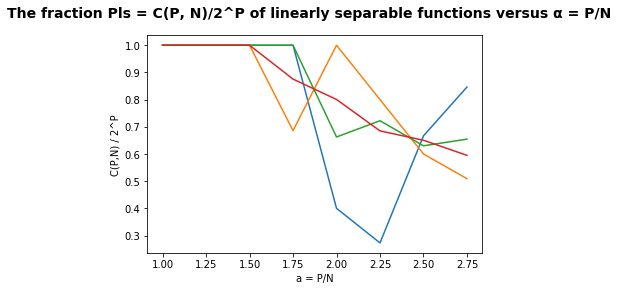

In [86]:
# Number of features (columns)
N = [5, 20, 40, 1000]
# The different ratios of P to N
A = np.arange(1.0, 3.0, 0.25)
# The margin of whether weights change
c = 0
# Initialize number of epochs
epochs = 500

for N in N:
    prob = []
    accuracy = []
    for a in A:
        # Number of training samples (rows)
        P = int(a*N)    
        # Initialize training samples
        x, s, w = init_(P, N)
        # Run Rosenblatt-Perceptron algorithm
        accuracy.append( rosenblattPerceptron(x, s, w, P, c) )

      '''  if (P <= N):
            prob.append(1)
        else:
            q = []
            for i in range(N):
                q.append( comb(P-1, i) )
            prob.append( 2**(1-P) * np.sum(q) )'''
            
    #successfulPlot(A, prob)
    successfulPlot(A, accuracy, ' ')
plt.show()

### Extension-3

Consider a non-zero value of c as introduced in class for updates when $E_\mu\leq c$. Does the
choice of $c$ influence the results in terms of $Q_{l.s.}$?

All instances are predicted correctly
The accuracy of the model for N = 40 and P = 30 equals: 1.0 

The accuracy of the model for N = 40 and P = 40 equals: 0.75 

The accuracy of the model for N = 40 and P = 50 equals: 0.62 

The accuracy of the model for N = 40 and P = 60 equals: 0.5833333333333334 

The accuracy of the model for N = 40 and P = 70 equals: 0.37142857142857144 

The accuracy of the model for N = 40 and P = 80 equals: 0.375 

The accuracy of the model for N = 40 and P = 90 equals: 0.6 

The accuracy of the model for N = 40 and P = 100 equals: 0.47 

The accuracy of the model for N = 40 and P = 110 equals: 0.4909090909090909 

The accuracy of the model for N = 40 and P = 120 equals: 0.4166666666666667 



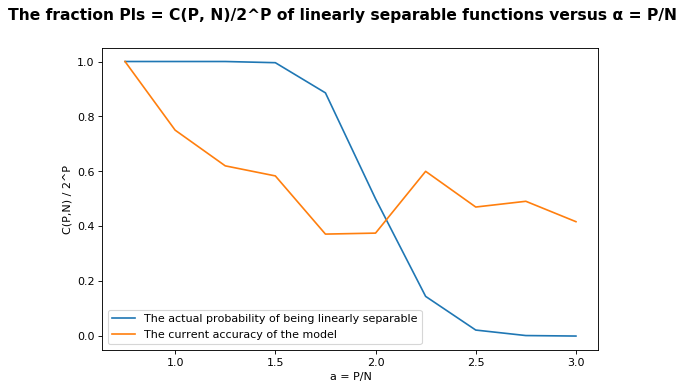

In [85]:
# Number of features (columns)
N = 40
# The different ratios of P to N
A = np.arange(0.75, 3.25, 0.25)
# The margin of whether weights change
c = 100
# Initialize number of epochs
epochs = 500
# Results
accuracy = []
prob = []

for a in A:
    # Number of training samples (rows)
    P = int(a*N)    
    # Initialize training samples
    x, s, w = init_(P, N)
    # Run Rosenblatt-Perceptron algorithm
    accuracy.append( rosenblattPerceptron(x, s, w, P, c) )
        
    if (P <= N):
        prob.append(1)
    else:
        q = []
        for i in range(N):
            q.append( comb(P-1, i) )
        prob.append( 2**(1-P) * np.sum(q) )
        
# Plot function
plt.figure(figsize=(8, 5), dpi=80)
successfulPlot(A, prob, 'The actual probability of being linearly separable')
successfulPlot(A, accuracy, 'The current accuracy of the model')
plt.legend(loc='best')
plt.show()